In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# 한글 표시를 위해 설치
!pip install koreanize_matplotlib -q

import koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 62.9 MB/s eta 0:00:00


### 데이터 설명

- tm : 시간 (신고접수 날짜, 단위: 일)

- address_city : 시/도명

- address_gu : 군/구명

- sub_address : 읍/면/동 명

- stn : AWS 지점 코드

- ta_min : 최저 기온 (일 최저 기온, 단위: ℃)

- ta_max : 최고 기온 (일 최고 기온, 단위: ℃)

- ta_max_min : 일교차 (일 최고기온과 최저기온의 차, 단위: ℃)

- rn_day : 일 강수량 (0~24시까지의 일 강수량, 단위: mm)

- ws_ins_max : 최대 순간 풍속 (일 최대 순간 풍속, 단위: m/s)

- ws_max : 최대 풍속 (일 최대 10분 평균 풍속, 단위: m/s)

- hm_min : 최소 상대 습도 (일 최소 상대 습도, 단위: %)

- hm_max : 최대 상대 습도 (일 최대 상대 습도, 단위: %)

- call_count : 신고건수 (일 신고 건수, 단위: 건)




### 데이터 설명 - 추가

- tm : 시간 (신고접수 날짜, 단위: 일)

- address_city : 시/도명

- address_gu : 군/구명

- sub_address : 읍/면/동 명

- cat : 종별 (신고 종류)

- sub_cat : 세부 종별 (신고 세부 종류)

- stn : AWS 지점 코드

- call_count : 신고건수 (일 신고 건수, 단위: 건)

In [35]:
AWS = pd.read_csv('/content/drive/MyDrive/기상청/방재기상관측(AWS)지점.csv')
display(AWS.head())

WEA = pd.read_csv('/content/drive/MyDrive/기상청/동네예보구역.csv')
display(WEA.head())

call_119 = pd.read_csv('/content/drive/MyDrive/기상청/call119_train.csv', index_col=0)
display(call_119.head())

CAT = pd.read_csv('/content/drive/MyDrive/기상청/cat119_train.csv', index_col=0)
display(CAT.head())

,지점번호,경도(degree),위도(degree),노장해발고도(m),지점명(한글),예보구역코드,법정동코드
0,90,128.56472,38.25085,18.06,속초,11D20401,4282033035
1,92,128.66670,38.06670,75.40,양양(공),11D20400,4283032021
2,95,127.30420,38.14788,153.70,철원,11D10101,4278025624
3,96,131.86983,37.23952,96.15,독도,11E00102,4794025027
4,98,127.06069,37.90186,109.06,동두천,11B20401,4125010300


,행정구역코드,1단계,2단계,3단계,격자 X,격자 Y,경도(초/100),위도(초/100)
0,kor,국문행정구역,NaN,NaN,0.0,0.0,NaN,NaN
1,1100000000,서울특별시,NaN,NaN,60.0,127.0,126.98,37.56
2,1111000000,서울특별시,종로구,NaN,60.0,127.0,126.98,37.57
3,1111051500,서울특별시,종로구,청운효자동,60.0,127.0,126.97,37.58
4,1111053000,서울특별시,종로구,사직동,60.0,127.0,126.97,37.57


,call119_train.tm,call119_train.address_city,call119_train.address_gu,call119_train.sub_address,call119_train.stn,call119_train.ta_max,call119_train.ta_min,call119_train.ta_max_min,call119_train.hm_min,call119_train.hm_max,call119_train.ws_max,call119_train.ws_ins_max,call119_train.rn_day,call119_train.call_count
1,20200501,부산광역시,강서구,대저2동,904,23.7,16.6,7.1,63.2,90.3,5.8,10.6,0.0,1
2,20200501,부산광역시,강서구,천성동,921,24.3,15.4,8.9,64.2,96.4,4.8,8.6,0.0,1
3,20200501,부산광역시,금정구,금사동,940,25.6,17.2,8.4,46.6,76.4,4.8,8.3,0.0,1
4,20200501,부산광역시,금정구,금성동,941,25.3,17.1,8.2,-99.0,-99.0,7.1,9.7,0.0,1
5,20200501,부산광역시,금정구,남산동,939,26.5,16.7,9.8,-99.0,-99.0,5.7,8.1,0.0,3


,cat119_train.tm,cat119_train.address_city,cat119_train.address_gu,cat119_train.sub_address,cat119_train.cat,cat119_train.sub_cat,cat119_train.stn,cat119_train.call_count
1,20200501,부산광역시,강서구,대저2동,구급,교통사고,904,1
2,20200501,부산광역시,강서구,천성동,구조,교통사고,921,1
3,20200501,부산광역시,금정구,금사동,구급,부상,940,1
4,20200501,부산광역시,금정구,금성동,기타,업무운행,941,1
5,20200501,부산광역시,금정구,남산동,구급,부상,939,1


In [40]:
call_119.head(60)

,call119_train.tm,call119_train.address_city,call119_train.address_gu,call119_train.sub_address,call119_train.stn,call119_train.ta_max,call119_train.ta_min,call119_train.ta_max_min,call119_train.hm_min,call119_train.hm_max,call119_train.ws_max,call119_train.ws_ins_max,call119_train.rn_day,call119_train.call_count
1,20200501,부산광역시,강서구,대저2동,904,23.7,16.6,7.1,63.2,90.3,5.8,10.6,0.0,1
2,20200501,부산광역시,강서구,천성동,921,24.3,15.4,8.9,64.2,96.4,4.8,8.6,0.0,1
3,20200501,부산광역시,금정구,금사동,940,25.6,17.2,8.4,46.6,76.4,4.8,8.3,0.0,1
4,20200501,부산광역시,금정구,금성동,941,25.3,17.1,8.2,-99.0,-99.0,7.1,9.7,0.0,1
5,20200501,부산광역시,금정구,남산동,939,26.5,16.7,9.8,-99.0,-99.0,5.7,8.1,0.0,3
6,20200501,부산광역시,금정구,부곡동,940,25.6,17.2,8.4,46.6,76.4,4.8,8.3,0.0,1
7,20200501,부산광역시,금정구,장전동,940,25.6,17.2,8.4,46.6,76.4,4.8,8.3,0.0,1
8,20200501,부산광역시,기장군,기장읍,923,26.9,15.9,11.0,49.7,87.6,4.2,7.3,0.0,1
9,20200501,부산광역시,기장군,일광면,923,26.9,15.9,11.0,49.7,87.6,4.2,7.3,0.0,2
10,20200501,부산광역시,기장군,장안읍,923,26.9,15.9,11.0,49.7,87.6,4.2,7.3,0.0,1


In [34]:
CAT.head(50)

,cat119_train.tm,cat119_train.address_city,cat119_train.address_gu,cat119_train.sub_address,cat119_train.cat,cat119_train.sub_cat,cat119_train.stn,cat119_train.call_count
1,20200501,부산광역시,강서구,대저2동,구급,교통사고,904,1
2,20200501,부산광역시,강서구,천성동,구조,교통사고,921,1
3,20200501,부산광역시,금정구,금사동,구급,부상,940,1
4,20200501,부산광역시,금정구,금성동,기타,업무운행,941,1
5,20200501,부산광역시,금정구,남산동,구급,부상,939,1
6,20200501,부산광역시,금정구,남산동,기타,업무운행,939,2
7,20200501,부산광역시,금정구,부곡동,구급,부상,940,1
8,20200501,부산광역시,금정구,장전동,구급,교통사고,940,1
9,20200501,부산광역시,기장군,기장읍,구급,교통사고,923,1
10,20200501,부산광역시,기장군,일광면,구급,부상,923,1


In [5]:
unique_values = call_119['call119_train.stn'].unique()
unique_values = sorted(call_119['call119_train.stn'].unique())
print(unique_values)

[np.int64(159), np.int64(904), np.int64(910), np.int64(921), np.int64(923), np.int64(937), np.int64(938), np.int64(939), np.int64(940), np.int64(941), np.int64(942), np.int64(950)]


In [6]:
# 1. call_119에서 유니크한 지점번호 추출
unique_stn = call_119['call119_train.stn'].unique()

# 2. AWS에서 지점번호가 unique_stn에 포함된 행만 필터링
filtered_AWS = AWS[AWS['지점번호'].isin(unique_stn)]

# 3. 인덱스 초기화
filtered_AWS = filtered_AWS.reset_index(drop=True)


filtered_AWS

,지점번호,경도(degree),위도(degree),노장해발고도(m),지점명(한글),예보구역코드,법정동코드
0,159,129.03203,35.10468,69.56,부산,11H20201,2611011600
1,904,128.96750,35.13700,4.28,사상,11H20200,2653010500
2,910,129.07420,35.06608,137.94,영도,11H20200,2620012100
3,921,128.83140,34.99310,73.26,가덕도,11H20200,2644012200
4,923,129.25110,35.27500,65.00,기장,11H20200,2671031022
5,937,129.16236,35.17610,62.98,해운대,11H20200,2635010500
6,938,129.01920,35.15890,114.00,부산진,11H20200,2623011100
7,939,129.10350,35.29320,53.11,금정구,11H20200,2641010100
8,940,129.09010,35.20919,71.50,동래,11H20200,2626010500
9,941,129.00260,35.21300,5.52,북구,11H20200,2632010400


In [7]:
filtered_WEA = WEA[WEA['1단계']=='부산광역시']
filtered_WEA = filtered_WEA.reset_index(drop=True)

# 3. 결과 확인
filtered_WEA

,행정구역코드,1단계,2단계,3단계,격자 X,격자 Y,경도(초/100),위도(초/100)
0,2600000000,부산광역시,NaN,NaN,98.0,76.0,129.08,35.18
1,2611000000,부산광역시,중구,NaN,97.0,74.0,129.03,35.10
2,2611051000,부산광역시,중구,중앙동,97.0,74.0,129.04,35.10
3,2611052000,부산광역시,중구,동광동,97.0,74.0,129.04,35.10
4,2611053000,부산광역시,중구,대청동,97.0,74.0,129.03,35.10
...,...,...,...,...,...,...,...,...
222,2671025000,부산광역시,기장군,기장읍,100.0,77.0,129.22,35.24
223,2671025300,부산광역시,기장군,장안읍,101.0,79.0,129.25,35.31
224,2671031000,부산광역시,기장군,일광면,101.0,78.0,129.23,35.26
225,2671032000,부산광역시,기장군,정관면,100.0,79.0,129.18,35.32


In [8]:
filtered_WEA.to_csv('/content/drive/MyDrive/기상청/filtered_WEA.csv', index=False, encoding='utf-8-sig')
filtered_AWS.to_csv('/content/drive/MyDrive/기상청/filtered_AWS.csv', index=False, encoding='utf-8-sig')

In [9]:
AWS.shape

(692, 7)

In [10]:
call_119.tail(10)

,call119_train.tm,call119_train.address_city,call119_train.address_gu,call119_train.sub_address,call119_train.stn,call119_train.ta_max,call119_train.ta_min,call119_train.ta_max_min,call119_train.hm_min,call119_train.hm_max,call119_train.ws_max,call119_train.ws_ins_max,call119_train.rn_day,call119_train.call_count
42915,20231031,부산광역시,수영구,수영동,937,26.3,8.8,17.5,20.2,97.4,4.6,8.4,0.0,1
42916,20231031,부산광역시,연제구,연산동,940,24.5,10.0,14.5,20.4,94.0,2.4,6.1,0.0,4
42917,20231031,부산광역시,영도구,동삼동,910,22.0,13.7,8.3,43.9,90.1,4.3,6.2,0.0,2
42918,20231031,부산광역시,영도구,봉래동,159,24.6,14.4,10.2,19.2,71.3,6.5,8.6,0.0,1
42919,20231031,부산광역시,중구,남포동,159,24.6,14.4,10.2,19.2,71.3,6.5,8.6,0.0,1
42920,20231031,부산광역시,해운대구,반송동,937,26.3,8.8,17.5,20.2,97.4,4.6,8.4,0.0,2
42921,20231031,부산광역시,해운대구,반여동,937,26.3,8.8,17.5,20.2,97.4,4.6,8.4,0.0,2
42922,20231031,부산광역시,해운대구,석대동,940,24.5,10.0,14.5,20.4,94.0,2.4,6.1,0.0,1
42923,20231031,부산광역시,해운대구,송정동,937,26.3,8.8,17.5,20.2,97.4,4.6,8.4,0.0,1
42924,20231031,부산광역시,해운대구,재송동,937,26.3,8.8,17.5,20.2,97.4,4.6,8.4,0.0,1


In [11]:
filtered = call_119[call_119['call119_train.address_gu'].isin(['부산진구', '북구'])]
print(filtered[['call119_train.tm', 'call119_train.address_gu', 'call119_train.sub_address', 'call119_train.hm_min', 'call119_train.hm_max']])

       call119_train.tm call119_train.address_gu call119_train.sub_address  \
21             20200501                     부산진구                       가야동   
22             20200501                     부산진구                       부암동   
23             20200501                     부산진구                       부전동   
24             20200501                       북구                       금곡동   
25             20200501                       북구                       만덕동   
...                 ...                      ...                       ...   
42894          20231031                     부산진구                       부전동   
42895          20231031                     부산진구                       전포동   
42896          20231031                       북구                       구포동   
42897          20231031                       북구                       금곡동   
42898          20231031                       북구                       화명동   

       call119_train.hm_min  call119_train.hm_max  
21         

In [12]:
from IPython.display import display

display(filtered[['call119_train.tm','call119_train.address_gu', 'call119_train.sub_address', 'call119_train.hm_min', 'call119_train.hm_max']])

,call119_train.tm,call119_train.address_gu,call119_train.sub_address,call119_train.hm_min,call119_train.hm_max
21,20200501,부산진구,가야동,-99.0,-99.0
22,20200501,부산진구,부암동,-99.0,-99.0
23,20200501,부산진구,부전동,-99.0,-99.0
24,20200501,북구,금곡동,-99.0,-99.0
25,20200501,북구,만덕동,-99.0,-99.0
...,...,...,...,...,...
42894,20231031,부산진구,부전동,20.5,91.9
42895,20231031,부산진구,전포동,20.5,91.9
42896,20231031,북구,구포동,18.3,96.2
42897,20231031,북구,금곡동,18.3,96.2


In [13]:
display(filtered['call119_train.hm_min'].value_counts())
display(filtered['call119_train.hm_max'].value_counts())

,count
call119_train.hm_min,
-99.0,1543
47.9,39
52.1,38
55.3,36
57.0,36
...,...
22.9,1
90.9,1
31.0,1


,count
call119_train.hm_max,
-99.0,1543
96.3,99
96.9,90
96.6,81
96.1,79
...,...
70.0,1
75.2,1
73.6,1


In [14]:
print((call_119['call119_train.ws_ins_max'] == 0.0).sum())

0


In [15]:
call_119['call119_train.ws_ins_max'].value_counts()

,count
call119_train.ws_ins_max,
6.7,880
6.9,797
6.2,746
7.1,734
5.8,697
...,...
23.6,1
24.2,1
2.4,1


In [16]:
call_119.head(100)

,call119_train.tm,call119_train.address_city,call119_train.address_gu,call119_train.sub_address,call119_train.stn,call119_train.ta_max,call119_train.ta_min,call119_train.ta_max_min,call119_train.hm_min,call119_train.hm_max,call119_train.ws_max,call119_train.ws_ins_max,call119_train.rn_day,call119_train.call_count
1,20200501,부산광역시,강서구,대저2동,904,23.7,16.6,7.1,63.2,90.3,5.8,10.6,0.0,1
2,20200501,부산광역시,강서구,천성동,921,24.3,15.4,8.9,64.2,96.4,4.8,8.6,0.0,1
3,20200501,부산광역시,금정구,금사동,940,25.6,17.2,8.4,46.6,76.4,4.8,8.3,0.0,1
4,20200501,부산광역시,금정구,금성동,941,25.3,17.1,8.2,-99.0,-99.0,7.1,9.7,0.0,1
5,20200501,부산광역시,금정구,남산동,939,26.5,16.7,9.8,-99.0,-99.0,5.7,8.1,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,20200502,부산광역시,영도구,대평동,159,21.8,17.0,4.8,69.2,89.9,6.5,10.0,1.1,1
97,20200502,부산광역시,영도구,동삼동,910,19.5,14.8,4.7,79.2,97.5,4.7,7.8,1.5,1
98,20200502,부산광역시,중구,영주동,159,21.8,17.0,4.8,69.2,89.9,6.5,10.0,1.1,1
99,20200502,부산광역시,해운대구,반여동,937,24.1,17.0,7.1,60.1,88.8,5.5,8.4,1.0,1


In [17]:
call_119.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42924 entries, 1 to 42924
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   call119_train.tm            42924 non-null  int64  
 1   call119_train.address_city  42924 non-null  object 
 2   call119_train.address_gu    42924 non-null  object 
 3   call119_train.sub_address   42924 non-null  object 
 4   call119_train.stn           42924 non-null  int64  
 5   call119_train.ta_max        42924 non-null  float64
 6   call119_train.ta_min        42924 non-null  float64
 7   call119_train.ta_max_min    42924 non-null  float64
 8   call119_train.hm_min        42924 non-null  float64
 9   call119_train.hm_max        42924 non-null  float64
 10  call119_train.ws_max        42924 non-null  float64
 11  call119_train.ws_ins_max    42924 non-null  float64
 12  call119_train.rn_day        42924 non-null  float64
 13  call119_train.call_count    42924 no

In [18]:
call_119.describe()

,call119_train.tm,call119_train.stn,call119_train.ta_max,call119_train.ta_min,call119_train.ta_max_min,call119_train.hm_min,call119_train.hm_max,call119_train.ws_max,call119_train.ws_ins_max,call119_train.rn_day,call119_train.call_count
count,4.292400e+04,42924.000000,42924.000000,42924.000000,42924.000000,42924.000000,42924.000000,42924.000000,42924.000000,42924.000000,42924.000000
mean,2.021586e+07,816.492126,26.025443,18.431968,7.286723,45.600601,76.598558,4.422377,8.185700,8.280265,1.916760
std,1.100894e+04,278.509107,8.059514,8.093267,6.623270,43.425352,49.403930,6.343533,7.183937,27.216865,2.058855
min,2.020050e+07,159.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,1.000000
25%,2.021051e+07,904.000000,23.600000,15.500000,5.500000,40.200000,83.300000,3.400000,6.100000,0.000000,1.000000
50%,2.021103e+07,938.000000,26.600000,19.500000,7.500000,56.500000,91.800000,4.200000,7.700000,0.000000,1.000000
75%,2.022103e+07,940.000000,29.400000,22.500000,9.600000,67.700000,96.700000,5.500000,9.900000,2.000000,2.000000
max,2.023103e+07,950.000000,37.600000,29.000000,23.000000,99.500000,100.000000,30.700000,37.800000,259.200000,115.000000


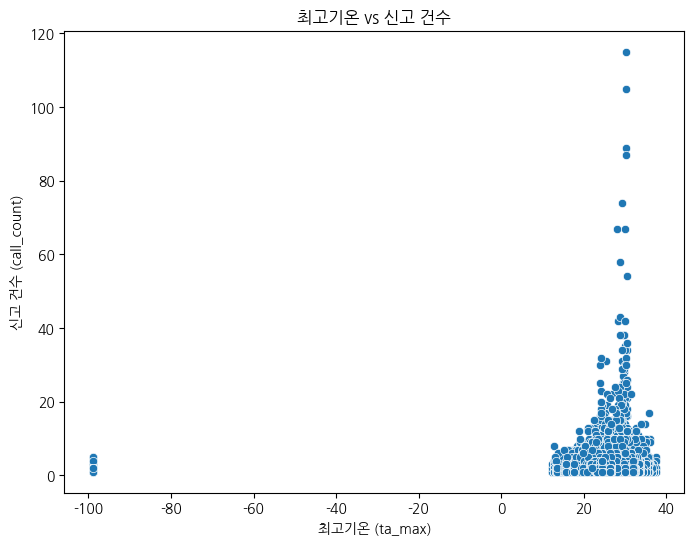

In [19]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=call_119, x='call119_train.ta_max', y='call119_train.call_count')
plt.title('최고기온 vs 신고 건수')
plt.xlabel('최고기온 (ta_max)')
plt.ylabel('신고 건수 (call_count)')
plt.show()

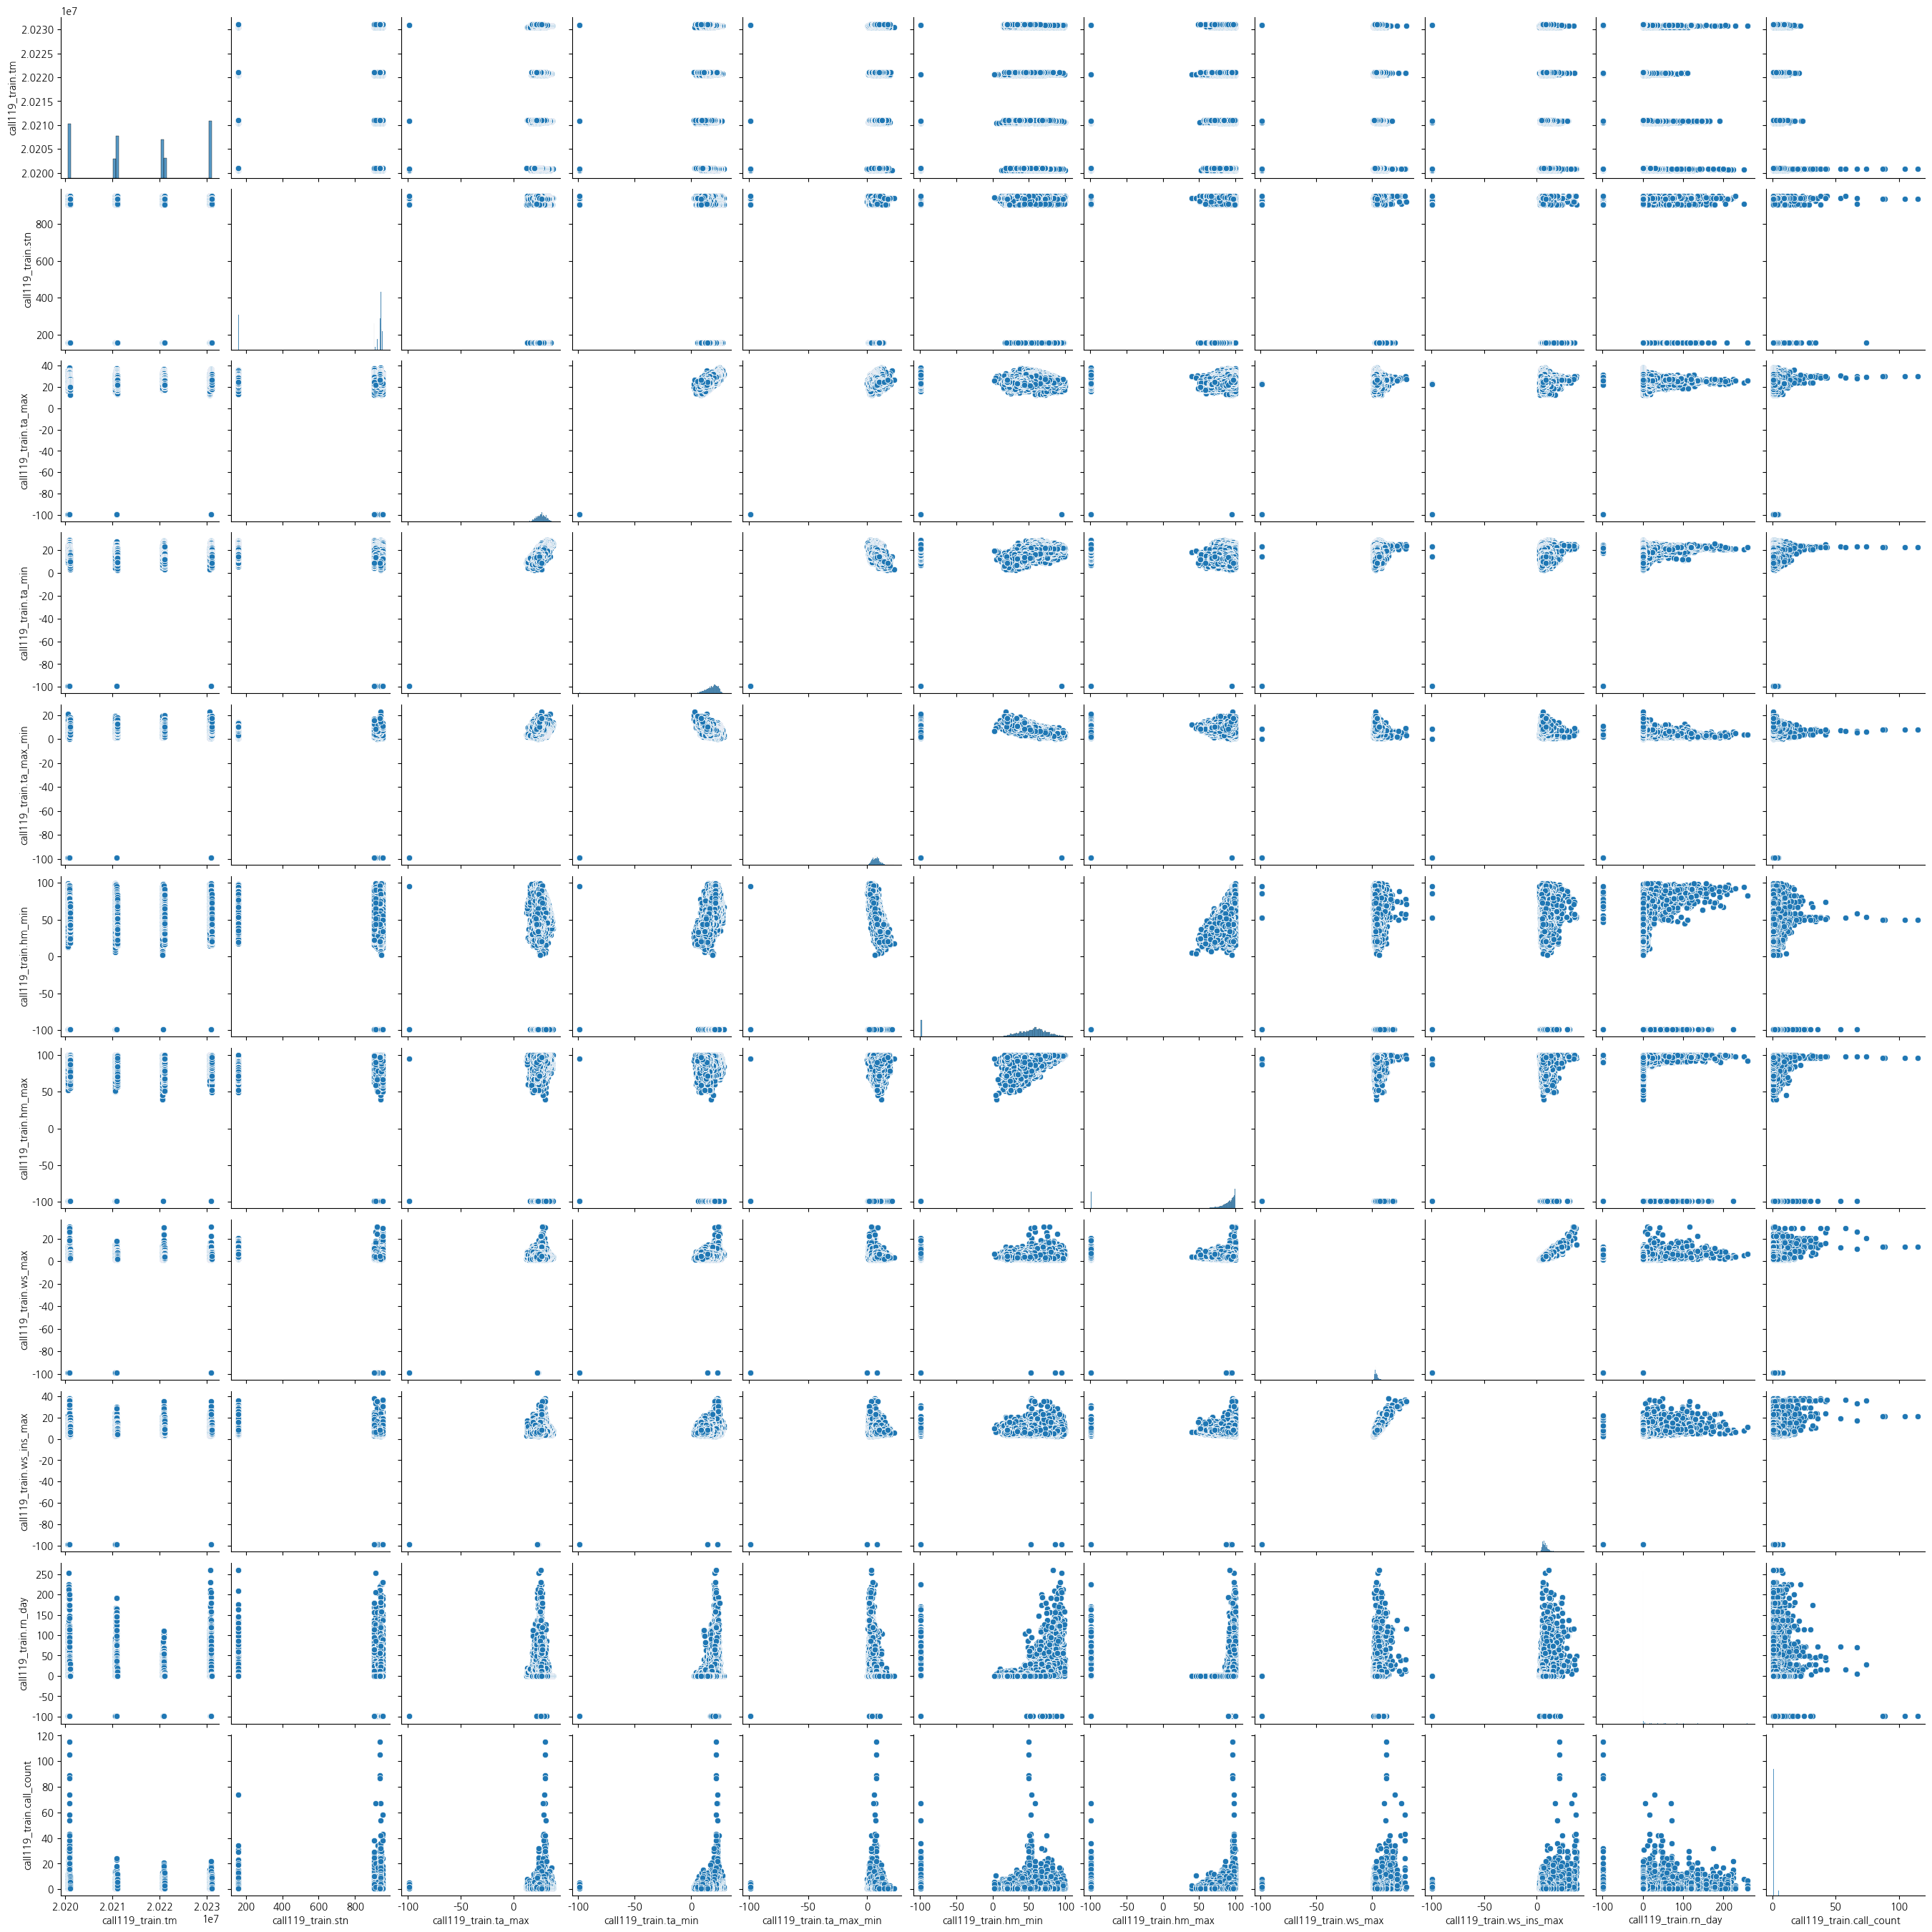

In [20]:
sns.pairplot(data=call_119)
plt.show()

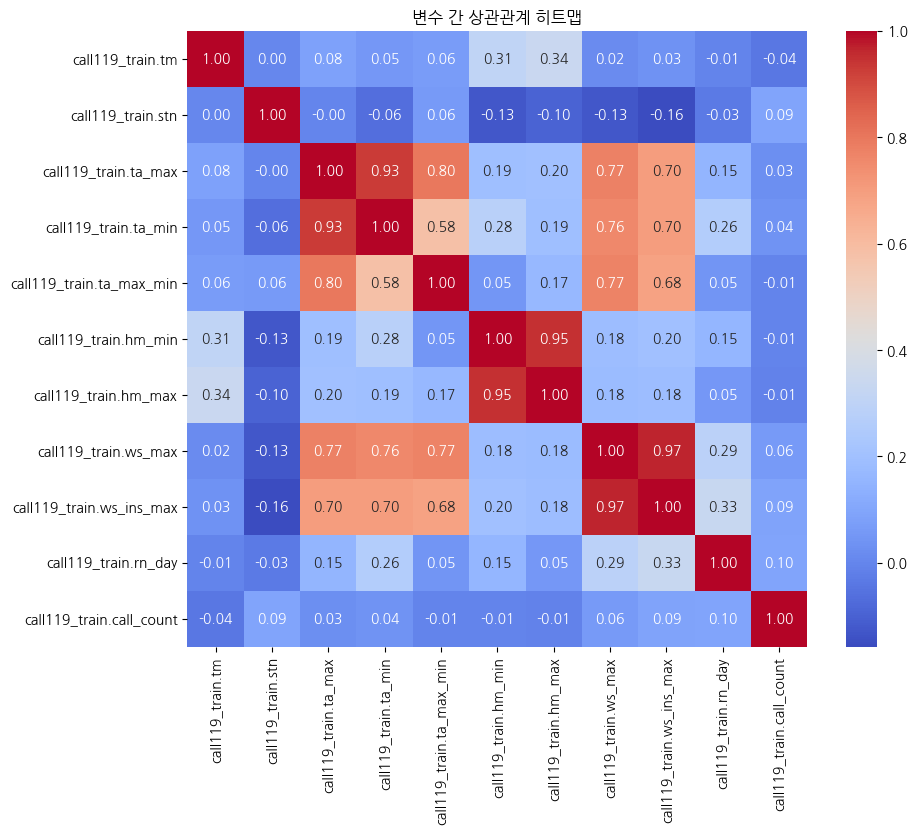

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(call_119.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('변수 간 상관관계 히트맵')
plt.show()


In [22]:
call_119['call119_train.call_count'].value_counts().sum()

np.int64(42924)

In [23]:
call_119['call119_train.tm'] = pd.to_datetime(call_119['call119_train.tm'], format='%Y%m%d')

haeundae_may = call_119[
    (call_119['call119_train.address_gu'] == '해운대구') &
    (call_119['call119_train.tm'].dt.month == 10)
]
haeundae_may

,call119_train.tm,call119_train.address_city,call119_train.address_gu,call119_train.sub_address,call119_train.stn,call119_train.ta_max,call119_train.ta_min,call119_train.ta_max_min,call119_train.hm_min,call119_train.hm_max,call119_train.ws_max,call119_train.ws_ins_max,call119_train.rn_day,call119_train.call_count
8530,2020-10-01,부산광역시,해운대구,반송동,937,25.8,14.6,11.2,56.3,91.5,3.9,7.0,0.0,1
8531,2020-10-01,부산광역시,해운대구,반여동,937,25.8,14.6,11.2,56.3,91.5,3.9,7.0,0.0,2
8532,2020-10-01,부산광역시,해운대구,우동,937,25.8,14.6,11.2,56.3,91.5,3.9,7.0,0.0,2
8533,2020-10-01,부산광역시,해운대구,재송동,937,25.8,14.6,11.2,56.3,91.5,3.9,7.0,0.0,1
8534,2020-10-01,부산광역시,해운대구,좌동,937,25.8,14.6,11.2,56.3,91.5,3.9,7.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42920,2023-10-31,부산광역시,해운대구,반송동,937,26.3,8.8,17.5,20.2,97.4,4.6,8.4,0.0,2
42921,2023-10-31,부산광역시,해운대구,반여동,937,26.3,8.8,17.5,20.2,97.4,4.6,8.4,0.0,2
42922,2023-10-31,부산광역시,해운대구,석대동,940,24.5,10.0,14.5,20.4,94.0,2.4,6.1,0.0,1
42923,2023-10-31,부산광역시,해운대구,송정동,937,26.3,8.8,17.5,20.2,97.4,4.6,8.4,0.0,1


In [24]:
call_119['call119_train.sub_address'].unique()

array(['대저2동', '천성동', '금사동', '금성동', '남산동', '부곡동', '장전동', '기장읍', '일광면',
       '장안읍', '감만동', '문현동', '용호동', '범일동', '수정동', '좌천동', '초량동', '명장동',
       '안락동', '온천동', '가야동', '부암동', '부전동', '금곡동', '만덕동', '화명동', '괘법동',
       '모라동', '삼락동', '엄궁동', '학장동', '감천동', '다대동', '신평동', '장림동', '아미동',
       '암남동', '광안동', '남천동', '망미동', '민락동', '연산동', '남항동', '대교동', '동삼동',
       '신선동', '남포동', '중앙동', '반송동', '반여동', '송정동', '재송동', '좌동', '중동',
       '대저1동', '명지동', '생곡동', '신호동', '두구동', '청룡동', '정관읍', '철마면', '대연동',
       '개금동', '당감동', '전포동', '구포동', '덕포동', '괴정동', '구평동', '하단동', '남부민동',
       '충무동', '거제동', '대평동', '영주동', '우동', '봉림동', '서동', '용당동', '수안동', '범천동',
       '양정동', '감전동', '주례동', '동대신동', '서대신동', '봉래동', '대청동', '강동동', '구서동',
       '낙민동', '복천동', '덕천동', '청학동', '오륜동', '사직동', '초읍동', '토성동', '미음동',
       '범방동', '수영동', '영선동', '부평동', '대항동', '당리동', '광복동', '동광동', '선동',
       '우암동', '명륜동', '부용동', '범전동', '연지동', '지사동', '초장동', '화전동', '노포동',
       '석대동', '구랑동', '죽림동', '칠산동', '성북동', '부민동', '식만동', '녹산동', '회동동',
       '동선동',

In [25]:
call_119['call119_train.call_count'].value_counts()

,count
call119_train.call_count,
1,23599
2,10549
3,4616
4,2030
5,959
6,467
7,214
8,145
10,74


In [38]:
call_119[call_119['call119_train.tm'] == 20200501]['call119_train.call_count'].sum()

np.int64(89)

In [26]:
call_119[call_119['call119_train.call_count']==115]

,call119_train.tm,call119_train.address_city,call119_train.address_gu,call119_train.sub_address,call119_train.stn,call119_train.ta_max,call119_train.ta_min,call119_train.ta_max_min,call119_train.hm_min,call119_train.hm_max,call119_train.ws_max,call119_train.ws_ins_max,call119_train.rn_day,call119_train.call_count
6884,2020-09-03,부산광역시,해운대구,좌동,937,30.2,22.5,7.7,49.9,96.2,13.1,21.3,-99.0,115


In [27]:
pd.set_option('display.max_rows', None)  # 모든 행 출력
call_119[call_119['call119_train.tm']=='2020-09-03']

,call119_train.tm,call119_train.address_city,call119_train.address_gu,call119_train.sub_address,call119_train.stn,call119_train.ta_max,call119_train.ta_min,call119_train.ta_max_min,call119_train.hm_min,call119_train.hm_max,call119_train.ws_max,call119_train.ws_ins_max,call119_train.rn_day,call119_train.call_count
6760,2020-09-03,부산광역시,강서구,강동동,904,29.8,23.2,6.6,53.8,96.0,15.1,37.8,48.5,13
6761,2020-09-03,부산광역시,강서구,녹산동,950,28.8,22.3,6.5,52.7,97.9,29.7,36.8,16.0,1
6762,2020-09-03,부산광역시,강서구,눌차동,921,23.3,23.3,0.0,85.9,92.8,-99.0,-99.0,0.0,1
6763,2020-09-03,부산광역시,강서구,대저1동,904,29.8,23.2,6.6,53.8,96.0,15.1,37.8,48.5,14
6764,2020-09-03,부산광역시,강서구,대저2동,904,29.8,23.2,6.6,53.8,96.0,15.1,37.8,48.5,17
6765,2020-09-03,부산광역시,강서구,동선동,921,23.3,23.3,0.0,85.9,92.8,-99.0,-99.0,0.0,1
6766,2020-09-03,부산광역시,강서구,명지동,904,29.8,23.2,6.6,53.8,96.0,15.1,37.8,48.5,28
6767,2020-09-03,부산광역시,강서구,범방동,904,29.8,23.2,6.6,53.8,96.0,15.1,37.8,48.5,2
6768,2020-09-03,부산광역시,강서구,생곡동,904,29.8,23.2,6.6,53.8,96.0,15.1,37.8,48.5,4
6769,2020-09-03,부산광역시,강서구,성북동,921,23.3,23.3,0.0,85.9,92.8,-99.0,-99.0,0.0,8


,call119_train.sub_address,count
93,연산동,730
79,송정동,704
101,우동,684
32,대연동,673
69,부전동,666


<ipython-input-28-c2288ba2cf42>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_dong, x='count', y='call119_train.sub_address', palette='Blues_d')


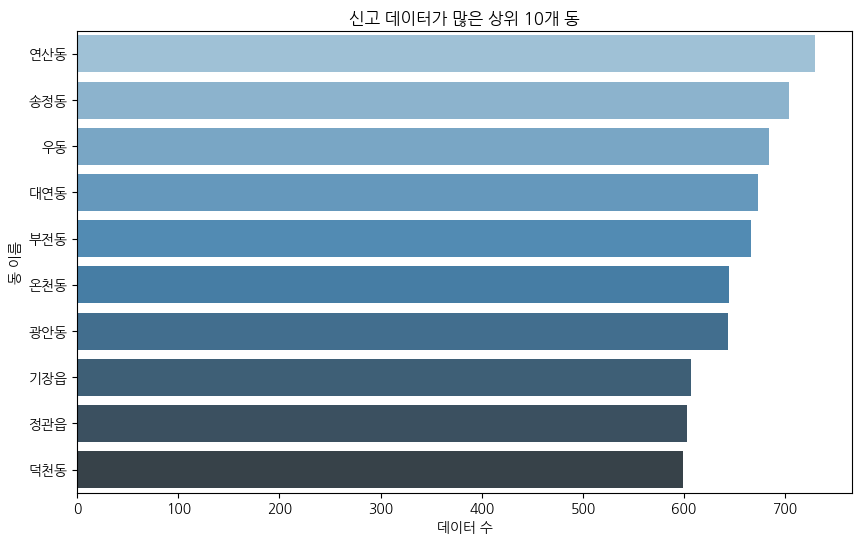

In [28]:
call_119['call119_train.sub_address'].value_counts()

dong_counts = call_119.groupby('call119_train.sub_address').size().reset_index(name='count')
dong_counts = dong_counts.sort_values(by='count', ascending=False)

display(dong_counts.head())

top10_dong = dong_counts.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top10_dong, x='count', y='call119_train.sub_address', palette='Blues_d')
plt.title('신고 데이터가 많은 상위 10개 동')
plt.xlabel('데이터 수')
plt.ylabel('동 이름')
plt.show()

In [29]:
call_119['call119_train.tm'] = pd.to_datetime(call_119['call119_train.tm'], format='%Y%m%d')

may19_busan = call_119[
    (call_119['call119_train.tm'].dt.month == 9) &
    (call_119['call119_train.tm'].dt.day == 3) &
    (call_119['call119_train.address_city'] == '부산광역시')
]

may19_busan['year'] = may19_busan['call119_train.tm'].dt.year

yearly_call_sum = may19_busan.groupby('year')['call119_train.call_count'].sum().reset_index()
print(yearly_call_sum)

from IPython.display import display
display(yearly_call_sum)


   year  call119_train.call_count
0  2020                      2334
1  2021                       131
2  2022                       153
3  2023                        74


<ipython-input-29-e1467845dfee>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  may19_busan['year'] = may19_busan['call119_train.tm'].dt.year


,year,call119_train.call_count
0,2020,2334
1,2021,131
2,2022,153
3,2023,74


In [30]:
call_119['call119_train.address_gu'].value_counts()

,count
call119_train.address_gu,
부산진구,4795
해운대구,3909
사하구,3600
금정구,3247
사상구,3229
강서구,3036
동래구,2899
북구,2678
남구,2509


In [31]:
daily_gu_calls = call_119.groupby(['call119_train.address_gu', 'call119_train.tm'])['call119_train.call_count'].sum().reset_index()
busanjin = daily_gu_calls[daily_gu_calls['call119_train.address_gu'] == '연제구']
display(busanjin)

,call119_train.address_gu,call119_train.tm,call119_train.call_count
8752,연제구,2020-05-01,9
8753,연제구,2020-05-02,6
8754,연제구,2020-05-03,3
8755,연제구,2020-05-04,6
8756,연제구,2020-05-05,3
8757,연제구,2020-05-06,5
8758,연제구,2020-05-07,6
8759,연제구,2020-05-08,4
8760,연제구,2020-05-09,5
8761,연제구,2020-05-10,5


In [39]:
call_119['call119_train.call_count'].sum()

np.int64(82275)

In [41]:
call_119[call_119['call119_train.address_gu'] == '해운대구'][['call119_train.ta_min', 'call119_train.ta_max_min']]

,call119_train.ta_min,call119_train.ta_max_min
49,16.4,8.9
50,16.4,8.9
51,16.4,8.9
52,16.4,8.9
53,16.4,8.9
54,16.4,8.9
99,17.0,7.1
100,17.0,7.1
101,17.0,7.1
102,17.0,7.1


In [42]:
call_119[call_119['call119_train.address_gu'] == '부산진구']['call119_train.stn']

array([937, 940])

In [48]:
# 연도 컬럼 생성
call_119['year'] = call_119['call119_train.tm'].astype(str).str[:4]

# 해운대구 데이터 필터링
haeundae_df = call_119[call_119['call119_train.address_gu'] == '부산진구']

# 연도 + 동(세부 주소)별로 그룹화 후, stn 하나씩 (대표값: 첫 번째)
result = (
    haeundae_df
    .groupby(['call119_train.sub_address', 'year'])['call119_train.stn']
    .first()
    .reset_index()
)

import pandas as pd
pd.set_option('display.max_rows', None)  # 행 제한 없이 보기
display(result)

,call119_train.sub_address,year,call119_train.stn
0,가야동,2020,938
1,가야동,2021,938
2,가야동,2022,938
3,가야동,2023,938
4,개금동,2020,938
5,개금동,2021,938
6,개금동,2022,938
7,개금동,2023,938
8,당감동,2020,938
9,당감동,2021,938


In [51]:
hm_min_neg99_counts = (
    call_119[call_119['call119_train.hm_min'] == -99.0]
    .groupby('call119_train.stn')
    .size()
    .reset_index(name='count')
    .sort_values(by='count', ascending=False)
)

print(hm_min_neg99_counts)

   call119_train.stn  count
7                942   1346
4                938    833
6                941    683
0                904     78
5                939     56
8                950     35
3                937     19
1                910      3
2                921      3


In [53]:
call_119.groupby('call119_train.stn').size().reset_index(name='total_count').sort_values(by='total_count', ascending=False)

,call119_train.stn,total_count
8,940,7415
0,159,6519
5,937,5830
1,904,4830
10,942,3854
6,938,3787
11,950,3426
9,941,3398
4,923,2018
7,939,1052


In [54]:
# 1~10건인 데이터 필터링
filtered = call_119[(call_119['call119_train.call_count'] >= 1) & (call_119['call119_train.call_count'] <= 10)]

# 컬럼별 평균값 계산
mean_values = filtered.mean(numeric_only=True)

# 결과 보기
print(mean_values)

call119_train.tm            2.021589e+07
call119_train.stn           8.162583e+02
call119_train.ta_max        2.601758e+01
call119_train.ta_min        1.841789e+01
call119_train.ta_max_min    7.291508e+00
call119_train.hm_min        4.563196e+01
call119_train.hm_max        7.663770e+01
call119_train.ws_max        4.393938e+00
call119_train.ws_ins_max    8.139635e+00
call119_train.rn_day        8.111139e+00
call119_train.call_count    1.832838e+00
dtype: float64
